In [3]:
from sklearn import preprocessing as pp
from sklearn import feature_selection as fs
from sklearn import decomposition as dr
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PropertyMol import PropertyMol
import numpy as np
import pandas as pd
from pprint import pprint
from kneed import KneeLocator
import seaborn as sns
import random
import os
import pickle
import molli as ml
from tqdm import tqdm

def create_mol_map(mlib_paths):

    mol_map = dict()
    for mlib_path in mlib_paths:
        mlib = ml.MoleculeLibrary(mlib_path)
        
        with mlib.reading():
            for name in mlib:
                m = mlib[name]
                rdmol = Chem.MolFromSmiles(m.attrib['_Canonical_SMILES'])
                rdmol.SetProp("_Name", name)
                mol_map[name] = rdmol
    
    return mol_map

def vis_k_clusters(
    ax,
    alk_type:str, 
    fs_arr:np.ndarray, 
    k: int, 
    random_state:int,
    pic_folder_label='cluster_pics',
    plot=False,
    plot_mols=False):
    
    #This does the same thing for each set of clusters
    print(f'Evaluating {k} clusters')
    #This top fit is being used to compute the centroids. This is under the assumption that these are the same when they are fit and transformed!!!
    kmeanModel = KMeans(n_clusters=k, random_state=random_state).fit(fs_arr)
    #This transforms the reduced array to a cluster distance space
    trans_fs_arr = kmeanModel.transform(fs_arr)

    pred_fs_arr = kmeanModel.predict(fs_arr)

    assert (ulabel := np.unique(pred_fs_arr).shape[0]) == k, f"Unique Predictions ({ulabel}) != k ({k})"
   
    _pca_fit = dr.PCA(n_components=2, random_state=random_state).fit(fs_arr)
    pca_trans = _pca_fit.transform(fs_arr)
    
    ax.grid(False)
    ax.set_xlabel(f"PCA 1", fontsize=18)
    ax.set_ylabel(f"PCA 2", fontsize=18)
    ax.set_title(f'{alk_type} K-Means (k={k})', fontsize=20)


    for i in tqdm(range(0,k)):
        #Gets the cluster centers and reshapes them for mapping
        full_cent = kmeanModel.cluster_centers_[i].reshape(1,fs_arr.shape[1])
        #Transforms the centroids to match the original fit
        pca_cent_coords = _pca_fit.transform(full_cent)
        #Coordinates of all points in the associated cluster
        coords = pca_trans[np.where(pred_fs_arr == i)[0]]

        #Plots the cluster scatter points and gives it that label
        scatter = ax.scatter(coords[:,0],coords[:,1], alpha=0.5)
        # scatter = ax.scatter(coords[:,0],coords[:,1], c=color_dict[i], alpha=0.5)
        scatter.set_label(f'{i}')
        # color_label.append(scatter)

        #Plots the cluster centroid
        ax.scatter(pca_cent_coords[:,0],pca_cent_coords[:,1], c='black', alpha=1)


    plt.tight_layout()
    

For MaxVol
Mono Axes(0.125,0.53;0.168478x0.35)
Evaluating 12 clusters


100%|██████████| 12/12 [00:00<00:00, 132.38it/s]


Gem Axes(0.300762,0.539056;0.198632x0.414611)
Evaluating 24 clusters


100%|██████████| 24/24 [00:00<00:00, 156.64it/s]


Cis Axes(0.550417,0.539056;0.185292x0.414611)
Evaluating 19 clusters


100%|██████████| 19/19 [00:00<00:00, 154.47it/s]


Trans Axes(0.799938,0.539056;0.180979x0.414611)
Evaluating 19 clusters


100%|██████████| 19/19 [00:00<00:00, 153.84it/s]


TriQ2 Axes(0.06,0.0451944;0.180979x0.414611)
Evaluating 21 clusters


100%|██████████| 21/21 [00:00<00:00, 137.65it/s]


TriQ3 Axes(0.310896,0.07375;0.179563x0.388917)
Evaluating 17 clusters


100%|██████████| 17/17 [00:00<00:00, 156.56it/s]


TriQ4 Axes(0.556125,0.07375;0.179562x0.388917)
Evaluating 14 clusters


100%|██████████| 14/14 [00:00<00:00, 167.78it/s]


Tetra Axes(0.801354,0.07375;0.179563x0.388917)
Evaluating 14 clusters


100%|██████████| 14/14 [00:00<00:00, 160.56it/s]



KMeans Analysis for All Alkene Classes Aligned with MaxVol Using Knee Values



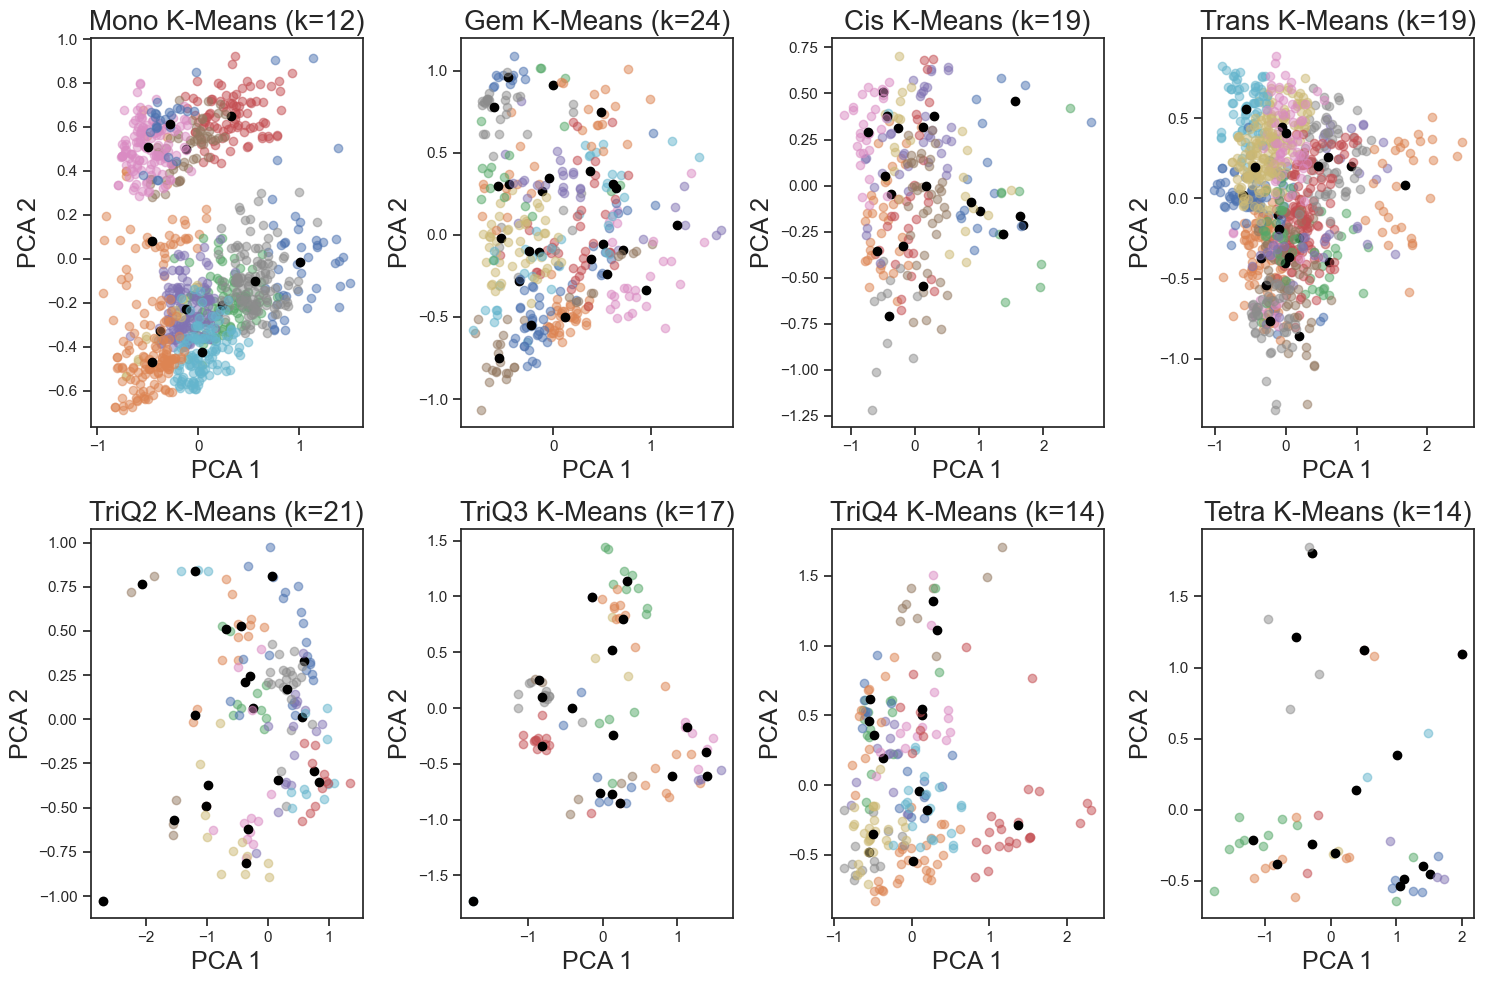

For BFSVol
Mono Axes(0.125,0.53;0.168478x0.35)
Evaluating 13 clusters


100%|██████████| 13/13 [00:00<00:00, 160.12it/s]


Gem Axes(0.305012,0.539056;0.197215x0.414611)
Evaluating 13 clusters


100%|██████████| 13/13 [00:00<00:00, 141.29it/s]


Cis Axes(0.554817,0.539056;0.181525x0.414611)
Evaluating 21 clusters


100%|██████████| 21/21 [00:00<00:00, 160.38it/s]


Trans Axes(0.801354,0.539056;0.179562x0.414611)
Evaluating 16 clusters


100%|██████████| 16/16 [00:00<00:00, 156.09it/s]


TriQ2 Axes(0.0656667,0.0451944;0.179563x0.414611)
Evaluating 25 clusters


100%|██████████| 25/25 [00:00<00:00, 69.21it/s] 


TriQ3 Axes(0.310896,0.07375;0.179562x0.388917)
Evaluating 22 clusters


100%|██████████| 22/22 [00:00<00:00, 147.06it/s]


TriQ4 Axes(0.556125,0.07375;0.179563x0.388917)
Evaluating 11 clusters


100%|██████████| 11/11 [00:00<00:00, 157.65it/s]


Tetra Axes(0.801354,0.07375;0.179562x0.388917)
Evaluating 15 clusters


100%|██████████| 15/15 [00:00<00:00, 154.37it/s]



KMeans Analysis for All Alkene Classes Aligned with BFSVol Using Knee Values



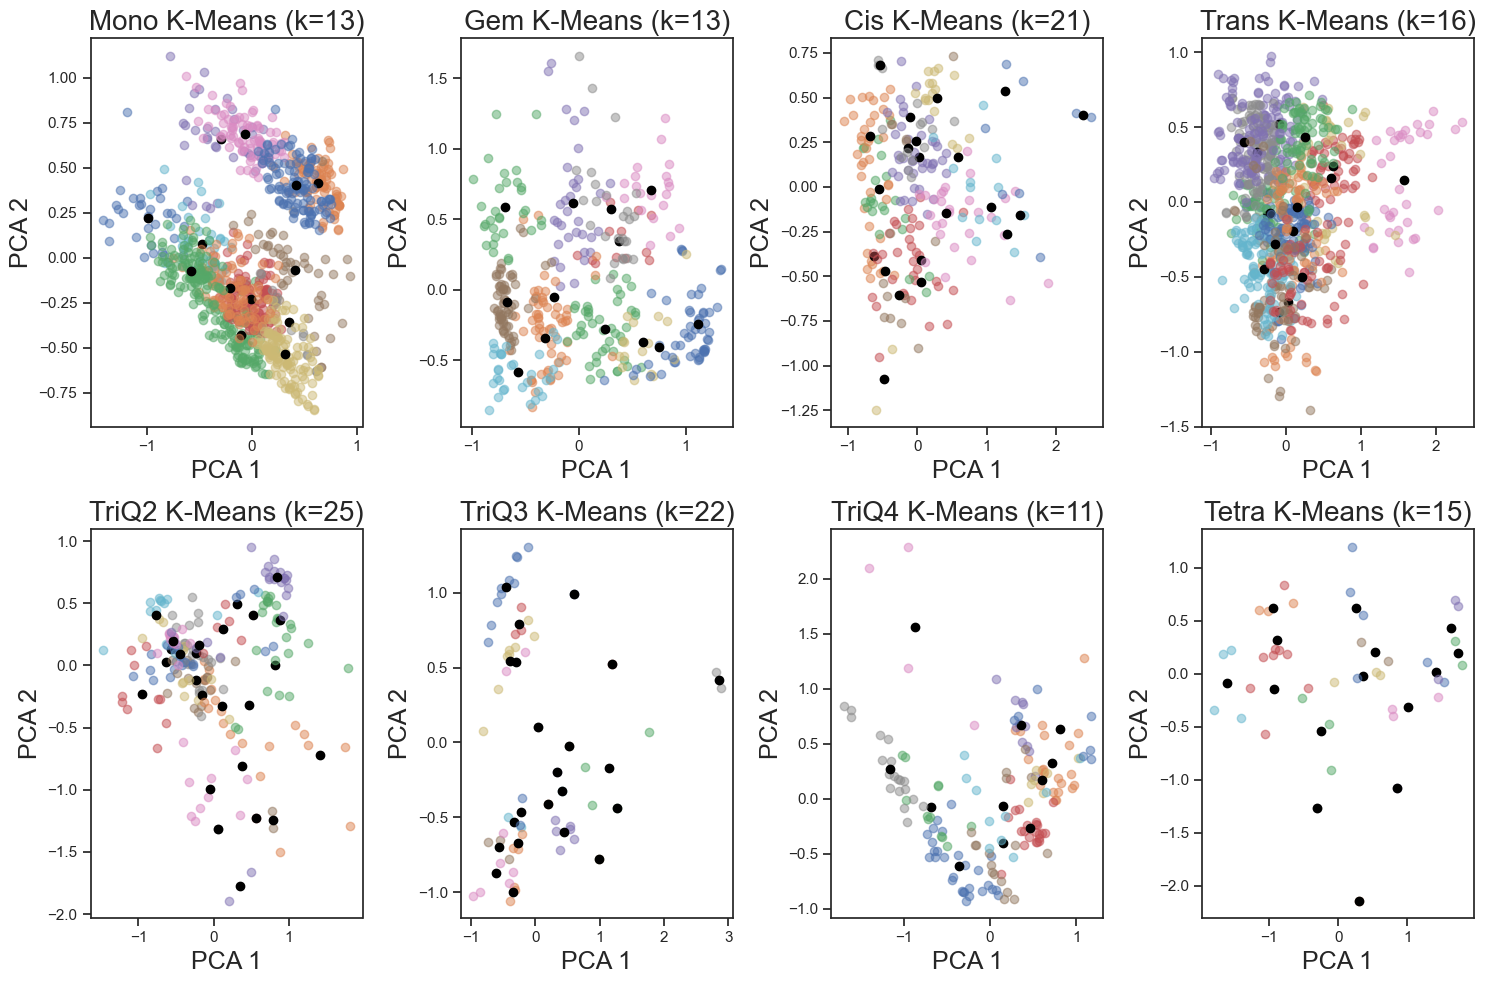

In [4]:
random_state = 42
np.random.seed(42)
random.seed(42)
sns.set_theme(style='ticks',font='Arial')

alk_types = [
"Mono",
"Gem",
"Cis",
"Trans",
"TriQ2",
"TriQ3",
"TriQ4",
"Tetra",
]

vols = ['MaxVol', 'BFSVol']

for vol_type in vols:
    print(f'For {vol_type}')

    #Loads overlap mappings
    with open(f'DB_EX_Name_{vol_type}_Map.pkl','rb') as f:
        db_ex_name_map = pickle.load(f)
    with open(f'EV_EX_Name_{vol_type}_Map.pkl', 'rb') as f:
        ev_ex_name_map = pickle.load(f)

    fig, axes = plt.subplots(2,4, figsize=(15,10))
    
    with open(f'{vol_type}_Kneed_Values.pkl', 'rb') as f:
        knee_res = pickle.load(f)
    
    for (alk_type, ax) in zip(alk_types, axes.flat):
        print(alk_type, ax)

        knee_val = knee_res[alk_type]

        # Isolates alkenes in external dataset
        ex_df_w_type = pd.read_csv(f"External_Full_Alkene_Desc_{vol_type}.csv", index_col=0)
        ex_df_alk_type = ex_df_w_type.loc[ex_df_w_type['Alkene Type'] == alk_type]
        ex_desc_df = ex_df_alk_type.loc[:, ex_df_alk_type.columns != 'Alkene Type']

        # Isolates alkenes in the database
        desc_df_w_type = pd.read_csv(f"Database_Full_Alkene_Desc_{vol_type}.csv", index_col=0)
        desc_df_alk_type = desc_df_w_type.loc[desc_df_w_type['Alkene Type'] == alk_type]
        db_desc_df = desc_df_alk_type.loc[:, desc_df_alk_type.columns != 'Alkene Type']

        #Removes redundant values between the SAD Database and External Dataset
        redundant_sad_ex = ex_desc_df.index.isin(list(db_ex_name_map.values()))

        fix_ex_desc_df = ex_desc_df[~redundant_sad_ex]    

        merge_db_ex = pd.concat([db_desc_df, fix_ex_desc_df])

        pipe = Pipeline(
        steps=[("scaler", pp.MinMaxScaler()), ("vt", fs.VarianceThreshold(threshold=0))]
        )
        merge_db_fs_array = pipe.fit_transform(merge_db_ex)

        
        vis_k_clusters(
            ax=ax,
            alk_type=alk_type,
            fs_arr=merge_db_fs_array,
            k = knee_val,
            random_state=random_state,
            pic_folder_label=f'{vol_type}_k_means_vis',
            plot=False,
            plot_mols=True
            )
        
    plt.tight_layout()
    print(f'\nKMeans Analysis for All Alkene Classes Aligned with {vol_type} Using Knee Values\n')
    plt.show()